# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here

import pandas as pd
import numpy as np

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()


,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
# code here

df_titanic["name"]

0                  Abbing, Mr. Anthony
1            Abbott, Mr. Eugene Joseph
2          Abbott, Mr. Rossmore Edward
3       Abbott, Mrs. Rhoda Mary 'Rosa'
4          Abelseth, Miss. Karen Marie
                     ...              
2202                  Wynn, Mr. Walter
2203               Yearsley, Mr. Harry
2204          Young, Mr. Francis James
2205               Zanetti, Sig. Minio
2206                Zarracchi, Sig. L.
Name: name, Length: 2207, dtype: object

In [3]:
# Code here

df_passengers = df_titanic.loc[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]
df_passengers

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [4]:
pd.crosstab(df_passengers["class"], df_passengers["embarked"])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
# Code here

# The conditional distribution of class given where they embarked
conditional_class_given_embarked = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize="columns")
conditional_class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.015228,0.527675,0.024390,0.108292
2nd,0.030457,0.095941,0.056911,0.151609
3rd,0.000000,0.376384,0.918699,0.305693
deck crew,0.116751,0.000000,0.000000,0.026609
engineering crew,0.218274,0.000000,0.000000,0.173886
restaurant staff,0.000000,0.000000,0.000000,0.042698
victualling crew,0.619289,0.000000,0.000000,0.191213


In [6]:
# What proportion of Southampton passengers were in 3rd class?

# Proportion of Southampton passengers who were in 3rd class
proportion_southampton_3rd = conditional_class_given_embarked.loc["3rd", "S"]
proportion_southampton_3rd

np.float64(0.3056930693069307)

In [7]:
conditional_embarked_given_class = pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize="index")
conditional_embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756
deck crew,0.348485,0.000000,0.000000,0.651515
engineering crew,0.132716,0.000000,0.000000,0.867284
restaurant staff,0.000000,0.000000,0.000000,1.000000
victualling crew,0.283063,0.000000,0.000000,0.716937


In [8]:
# what is the proportion of third class passengers who embarked at Southampton?

# Proportion of 3rd class passengers who embarked at Southampton
proportion_3rd_southampton = conditional_embarked_given_class.loc["3rd", "S"]
proportion_3rd_southampton

np.float64(0.6967559943582511)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

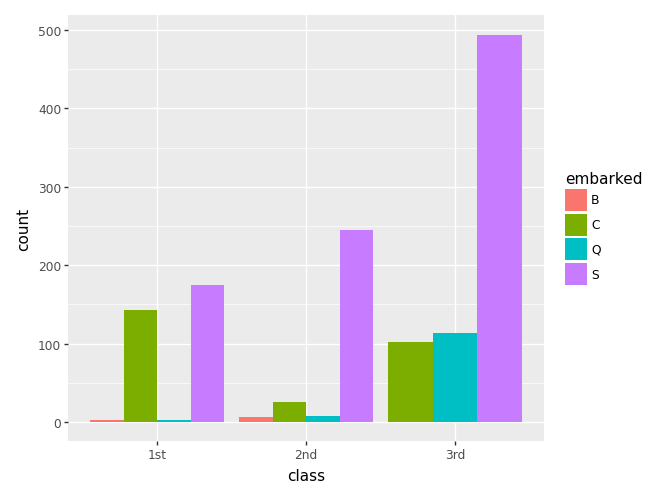

In [9]:
# Code here

import plotnine as p9
from plotnine import *
import pandas as pd

ggplot(df_passengers, aes(x="class", fill="embarked")) + geom_bar(position="dodge")

I think this visualization is good at comparing the different classes of individuals because they are side-by-side. We're able to see that the majority of passengers embarked from Southampton. The crosstab plots above are better at showing the proportion of passengers and calculating probabilities.